### Utility

In [1]:
import numpy as np

In [2]:
def sgn(x):
  if x==0:
    return 1
  else:
    return np.sign(x)

### Hessenberg Reduction

In [3]:
def myHess(A):
    m,n=A.shape
    R=np.copy(A)
    for i in range(n-2):
      # Qi = np.eye(n) # householder transform matrix at step i
      v = R[i+1:, i]
      # construct e
      e = np.zeros(n-i-1)
      e[0] = 1
      # constuct the reflection vector x
      w = -sgn(v[0])*e*np.linalg.norm(v) + v
      x = np.zeros(n)
      x[i+1:] = w/np.linalg.norm(w)
      # apply changes onto the input matrix to get R = Q...A...Q
      R-=2*np.outer(x, x@R)
      R-=2*np.outer(R@x, x)
    return R

### QR-Francis Algorithm

In [6]:
def myEigen(H):

  B = np.copy(H)
  m, n = B.shape
  if n == 1:
    return B[0, 0]
  # matrix that holds the eigenvalues of the block
  eig = np.zeros(n)
  # deflation index set to 0 intially
  d = 0

  while True: 

    # check for deflation
    for i in range(1,n):
      if np.abs(B[i, i-1]) <= 10e-14:
        d = i # use row index
        break
    # break from the main while loop if deflation point is met
    if d != 0:
      break

    # Rayleigh's Shift on Matrix 
    shifted = B[0, 0]-B[n-1, n-1]
    a = np.sqrt(shifted**2 + (B[1, 0])**2) 
    R = np.array([[shifted/a, B[1, 0]/a], [-B[1, 0]/a, shifted/a]]) 
    B[:2, :] = R@B[:2, :]
    B[:, :2] = B[:, :2]@np.transpose(R)

    # Chasing the Bulge
    for j in range(0,n-2):
      a = np.linalg.norm(B[j+1:j+3, j]) # j = 0, B[1:3, 0] 
      R = np.array([[B[j+1, j]/a, B[j+2, j]/a], [-B[j+2, j]/a, B[j+1, j]/a]]) 
      B[j+1:j+3, :] = R@B[j+1:j+3, :]
      B[:, j+1:j+3] = B[:, j+1:j+3]@np.transpose(R)

  # Out of Whileloop: return eig
  eig[:d] = myEigen(B[:d, :d])
  eig[d:] = myEigen(B[d:, d:])
  
  return eig

### Testing

In [4]:
# Hessenberg Reduction
for i in range(10):
  P=np.random.rand(50,50)
  d=np.random.rand(50)
  A=np.linalg.inv(P)@np.diag(d)@P
  d.sort()
  H=myHess(A)
  eigen=np.linalg.eigvals(H)
  eigen.sort()
  print(np.allclose(eigen,d))
  print(np.allclose(np.zeros((49,49)),np.tril(H[1:,:49],-1)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


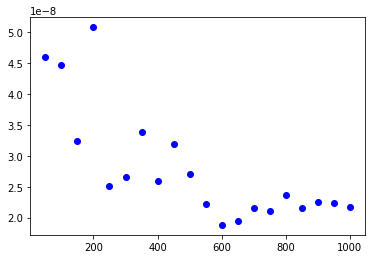

In [5]:
 # Hessenberg Reduction at O(n^3) Time Complexity
 from time import process_time as pt
n=20
k=50
times=np.zeros(n)
x=np.linspace(k,k*n,num=n)
for i in range(n):
  A=np.random.rand(k+i*k,k+i*k)
  start=pt()
  myHess(A)
  times[i]=(pt()-start)/(k+i*k)**3
from matplotlib import pyplot as plt
plt.plot(x,times,"bo")

In [7]:
# Francis Algorithm
for i in range(10): 
  P=np.random.rand(10,10) #50
  d=np.random.rand(10)
  B=np.linalg.inv(P)@np.diag(d)@P
  d[::-1].sort()
  eigen=myEigen(myHess(B))
  eigen[::-1].sort()
  print(np.max(np.abs(d-eigen)))

3.0309088572266774e-14
1.1157741397482823e-14
2.020605904817785e-14
7.882583474838611e-15
4.6629367034256575e-15
8.604228440844963e-14
1.3822276656583199e-14
4.3298697960381105e-14
4.3770542745846797e-14
1.432187701766452e-14


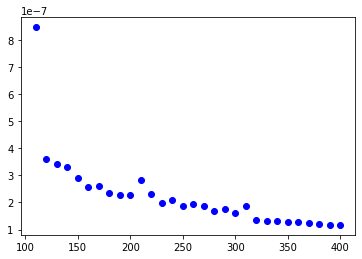

In [8]:
# Francs Algorithm Time Complexity
from time import process_time as pt
n=30
k=10
k0=100
times=np.zeros(n)
x=np.linspace(k0+k,k0+k*n,num=n)
for i in range(n):
  P=np.random.rand(k0+k+i*k,k0+k+i*k)
  d=np.random.rand(k0+k+i*k)
  B=np.linalg.inv(P)@np.diag(d)@P
  start=pt()
  myEigen(myHess(B))
  times[i]=(pt()-start)/(k0+k+i*k)**3
from matplotlib import pyplot as plt
plt.plot(x,times,"bo")

### Notice
Francis Algorithm is more stable and faster than orthogonal iteration. 